<a href="https://colab.research.google.com/github/rrwiren/ilmanlaatu-ennuste-helsinki/blob/main/Helsinki_Weather_Data_Visualization_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported successfully!
CSV loaded successfully with comma separator, skipping header, and assigning names.

First 5 rows of the DataFrame:
         Havaintoasema  Vuosi  Kuukausi  Päivä Aika [Paikallinen aika]  \
0  Helsinki Kaisaniemi   2020         4      1                   00:00   
1  Helsinki Kaisaniemi   2020         4      1                   01:00   
2  Helsinki Kaisaniemi   2020         4      1                   02:00   
3  Helsinki Kaisaniemi   2020         4      1                   03:00   
4  Helsinki Kaisaniemi   2020         4      1                   04:00   

  Lämpötilan keskiarvo [°C] Keskituulen nopeus [m/s]  \
0                         2                      6.2   
1                       2.8                      5.6   
2                       3.1                      5.3   
3                       3.2                      3.9   
4                         3                      3.9   

  Tuulen suunnan keskiarvo [°] Ilmanpaineen keskiarvo [hPa]  
0      

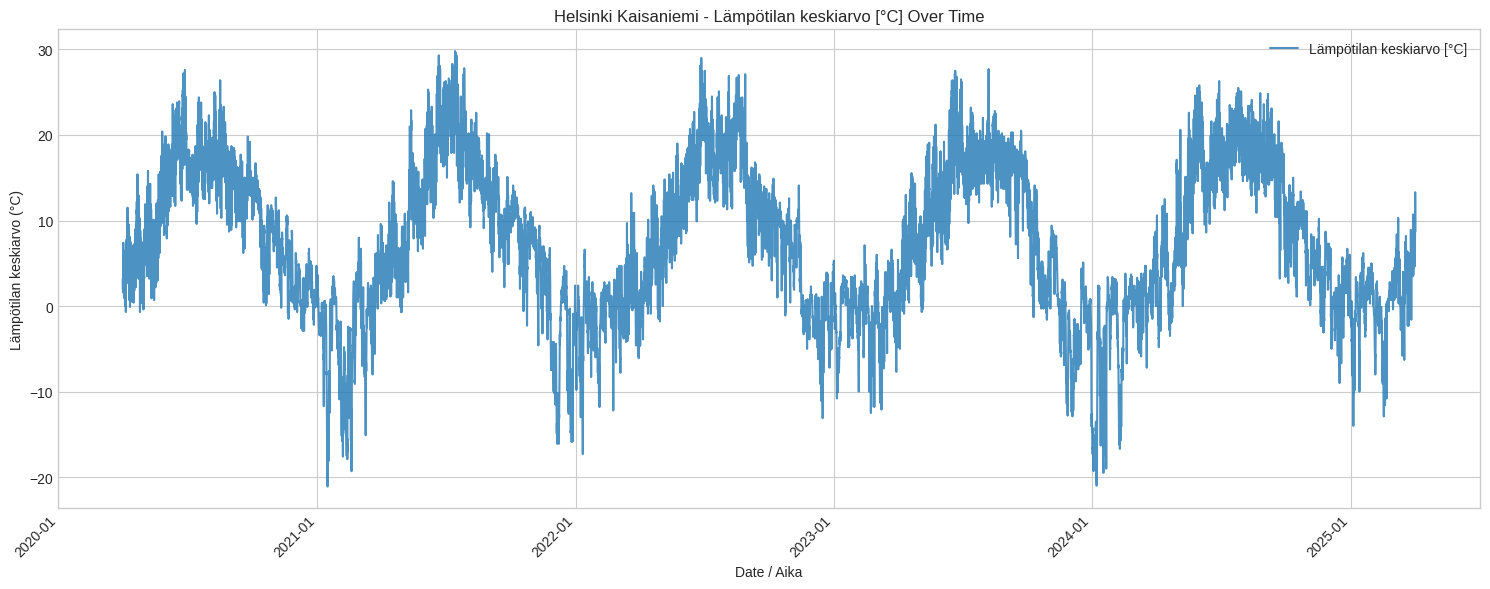

In [1]:
# -*- coding: utf-8 -*-
# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: light
#       format_version: '1.5'
#       jupytext_version: 1.14.5
#   kernelspec:
#     display_name: Python 3 (ipykernel)
#     language: python
#     name: python3
# ---

# # Helsinki Kaisaniemi Weather Data - Basic Visualization (Harjoitus)
#
# This notebook loads **weather data** for the Helsinki Kaisaniemi station from a GitHub URL and performs simple visualization.
# **Note:** The provided URL contained weather data, not air quality pollutants.
#
# Tämä notebook lataa **säätietoja** Helsingin Kaisaniemen asemalta GitHub URL:sta ja tekee siitä yksinkertaisen visualisoinnin.
# **Huom:** Annettu URL sisälsi säätietoja, ei ilmanlaatusaasteita.

# ## 1. Import Libraries
#
# Import pandas for data manipulation and matplotlib for plotting.
# Tuodaan pandas datankäsittelyyn ja matplotlib visualisointiin.

# +
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # For formatting dates on plots

print("Libraries imported successfully!")
# -

# ## 2. Load Data
#
# Define the URL for the raw CSV file on GitHub and load it into a pandas DataFrame.
# We'll skip the problematic header row and assign column names manually.
#
# Määritellään GitHubissa olevan CSV-tiedoston URL ja ladataan se pandas DataFrameen.
# Ohitetaan ongelmallinen otsikkorivi ja määritellään sarakenimet manuaalisesti.

# +
# URL provided by the user
csv_url = "https://raw.githubusercontent.com/rrwiren/ilmanlaatu-ennuste-helsinki/refs/heads/main/data/raw/Helsinki%20Kaisaniemi_%201.4.2020%20-%201.4.2025_d5590617-bf91-46c7-96f4-1fb70892265d.csv"

# Define column names manually based on the observed problematic header
# (Correcting potential encoding issues like Ã¤ -> ä, Â° -> °)
column_names = [
    'Havaintoasema',
    'Vuosi',
    'Kuukausi',
    'Päivä',
    'Aika [Paikallinen aika]',
    'Lämpötilan keskiarvo [°C]',
    'Keskituulen nopeus [m/s]',
    'Tuulen suunnan keskiarvo [°]',
    'Ilmanpaineen keskiarvo [hPa]'
]

# Attempt to load the CSV file using comma separator, skipping the header
try:
    df = pd.read_csv(
        csv_url,
        sep=',',            # Use comma as separator
        decimal='.',        # Assume dot as decimal separator with comma sep
        encoding='latin-1', # Keep latin-1 as it seemed to load bytes
        skiprows=1,         # Skip the original header row
        header=None,        # Tell pandas there's no header in the data rows
        names=column_names  # Assign the manually defined names
    )
    print("CSV loaded successfully with comma separator, skipping header, and assigning names.")

except Exception as e:
    print(f"Failed to load CSV: {e}")
    print("Could not load the CSV file. Please check the URL and file format.")
    # Optional: Raise an error or exit if loading fails
    # raise

# Display the first few rows and basic info if loaded successfully
if 'df' in locals():
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()
# -

# ## 3. Data Cleaning and Preparation
#
# Inspect the data and prepare it for visualization.
# * Combine Year, Month, Day, and Time columns into a single datetime column.
# * Set the datetime column as the DataFrame index.
# * Ensuring weather data columns are numeric.
#
# Tutkitaan dataa ja valmistellaan se visualisointia varten.
# * Yhdistetään Vuosi, Kuukausi, Päivä ja Aika sarakkeet yhdeksi datetime-sarakkeeksi.
# * Asetetaan datetime-sarake DataFramen indeksiksi.
# * Varmistetaan, että säädatan sarakkeet ovat numeerisia.

# +
if 'df' in locals():
    # --- Create and Convert Timestamp Column ---
    print("\nCreating combined datetime column...")
    try:
        # Combine date and time parts into a single string column
        # Ensure components are strings before concatenation
        df['DateTimeString'] = df['Vuosi'].astype(str) + '-' + \
                               df['Kuukausi'].astype(str).str.zfill(2) + '-' + \
                               df['Päivä'].astype(str).str.zfill(2) + ' ' + \
                               df['Aika [Paikallinen aika]']

        # Convert the combined string column to datetime objects
        df['Aika'] = pd.to_datetime(df['DateTimeString'])
        print("'Aika' column created and converted successfully.")

        # Set the datetime column as the index
        print(f"Setting 'Aika' as index...")
        df.set_index('Aika', inplace=True)
        print("Index set successfully.")

        # Optionally drop intermediate columns
        df.drop(columns=['Vuosi', 'Kuukausi', 'Päivä', 'Aika [Paikallinen aika]', 'DateTimeString'], inplace=True)
        print("Original date/time columns dropped.")

    except Exception as e:
        print(f"Error creating or setting index: {e}")
        print("Skipping index setting and dropping columns.")


    # --- Ensure Weather Data Columns are Numeric ---
    # Identify weather columns to convert
    weather_columns = [
        'Lämpötilan keskiarvo [°C]',
        'Keskituulen nopeus [m/s]',
        'Tuulen suunnan keskiarvo [°]',
        'Ilmanpaineen keskiarvo [hPa]'
    ]

    print("\nConverting weather columns to numeric...")
    for col in weather_columns:
        if col in df.columns:
            # Convert to numeric, coercing errors
            # Need to handle potential comma decimals if sep=',' didn't handle it
            if df[col].dtype == 'object':
                 df[col] = df[col].str.replace(',', '.', regex=False) # Replace comma decimal if needed
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f" - Column '{col}' converted to numeric (errors coerced to NaN).")
        else:
            print(f" - Warning: Weather column '{col}' not found.")

    # Display info again to see changes
    print("\nDataFrame Info after cleaning:")
    df.info()
    print("\nFirst 5 rows after cleaning:")
    print(df.head())

# -

# ## 4. Basic Visualization
#
# Create a simple time series plot for one of the weather variables (e.g., Temperature).
# Luodaan yksinkertainen aikasarjakuvaaja yhdelle säämuuttujalle (esim. Lämpötila).

# +
if 'df' in locals() and isinstance(df.index, pd.DatetimeIndex):
    # --- Plot Time Series ---
    # *** Choose the weather variable you want to plot ***
    variable_to_plot = 'Lämpötilan keskiarvo [°C]' # <<< CHANGE THIS IF NECESSARY

    if variable_to_plot in df.columns:
        print(f"\nPlotting time series for '{variable_to_plot}'...")

        plt.style.use('seaborn-v0_8-whitegrid') # Use a clean plot style
        fig, ax = plt.subplots(figsize=(15, 6)) # Create a figure and axes object

        df[variable_to_plot].plot(ax=ax, label=variable_to_plot, alpha=0.8)

        # Improve formatting
        ax.set_title(f'Helsinki Kaisaniemi - {variable_to_plot} Over Time')
        ax.set_xlabel('Date / Aika')
        # Extract unit from column name if possible, otherwise set manually
        unit = variable_to_plot.split('[')[-1].split(']')[0] if '[' in variable_to_plot else 'Units'
        ax.set_ylabel(f'{variable_to_plot.split("[")[0].strip()} ({unit})') # Get name before unit
        ax.legend()
        ax.grid(True) # Add grid lines

        # Format x-axis dates for better readability
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.xticks(rotation=45) # Rotate x-axis labels

        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show() # Display the plot

    else:
        print(f"Cannot plot: Column '{variable_to_plot}' not found or data is not numeric.")

    # --- Optional: Plot Histogram ---
    # You can uncomment this section to plot a histogram of the distribution

    # print(f"\nPlotting histogram for '{variable_to_plot}'...")
    # fig_hist, ax_hist = plt.subplots(figsize=(10, 5))
    # df[variable_to_plot].hist(ax=ax_hist, bins=50, alpha=0.7)
    # ax_hist.set_title(f'Distribution of {variable_to_plot}')
    # ax_hist.set_xlabel(f'{variable_to_plot.split("[")[0].strip()} ({unit})')
    # ax_hist.set_ylabel('Frequency / Frekvenssi')
    # ax_hist.grid(False)
    # plt.tight_layout()
    # plt.show()

elif 'df' in locals():
    print("\nSkipping plotting because the index is not a DatetimeIndex. Please check Step 3.")
else:
    print("\nSkipping plotting because the DataFrame was not loaded successfully.")

# -

# ## 5. Next Steps
#
# This notebook now visualizes weather data from the provided file. Potential next steps include:
# * Finding a data source that contains the actual **air quality pollutant data** (PM2.5, NO2, etc.) for Helsinki Kaisaniemi or other stations.
# * Handling missing values in the weather data (e.g., interpolation).
# * Calculating rolling averages for weather variables.
# * Merging this weather data with air quality data once obtained.
#
# Tämä notebook visualisoi nyt säätietoja annetusta tiedostosta. Mahdollisia seuraavia vaiheita:
# * Etsiä datalähde, joka sisältää varsinaiset **ilmanlaadun saastetiedot** (PM2.5, NO2, jne.) Helsingin Kaisaniemen tai muiden asemien osalta.
# * Käsitellä puuttuvat arvot säätiedoissa (esim. interpolointi).
# * Laskea liukuvia keskiarvoja säämuuttujille.
# * Yhdistää tämä säätieto ilmanlaatutietoon, kun se on saatavilla.